# Week 5
## Plotting in Python: Matplotlib, Pandas, Seaborn.

# Basic Outline
  
  
* Motivation: Why plot our data?
* How do we plot data?
* Plotting Styles
* In-Class / HW Assignment

# Why plot our data?



* Allows us to spot patterns we would otherwise miss

* Allows us to convey data to colaborators

* Gelman and Unwin 2011:
> A well-designed graph can display more information than a table of the same size, and more information than numbers embedded in text. Graphical displays allow and encourage direct visual comparisons.

# Let's see an example: Iris

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

* Dataset of 3 species of flowers (n=150), with various features (petal width, petal length, sepal width, sepal length)   


* https://www.kaggle.com/uciml/iris

![base](img/Petal-sepal.jpg)
* Photograph made in Hawai'i by Eric Guinther

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets
iris = datasets.load_iris()

columns = ("sepal_length", "sepal_width", "petal_length", "petal_width", "species")

iris = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns=columns)
iris["species_name"] = iris["species"].map({0.0: "Setosa", 1.0: "Versicolour", 2.0: "Virginica"})
iris #.head())

sepal_length  sepal_width  petal_length  petal_width  species  \
0             5.1          3.5           1.4          0.2      0.0   
1             4.9          3.0           1.4          0.2      0.0   
2             4.7          3.2           1.3          0.2      0.0   
3             4.6          3.1           1.5          0.2      0.0   
4             5.0          3.6           1.4          0.2      0.0   
..            ...          ...           ...          ...      ...   
145           6.7          3.0           5.2          2.3      2.0   
146           6.3          2.5           5.0          1.9      2.0   
147           6.5          3.0           5.2          2.0      2.0   
148           6.2          3.4           5.4          2.3      2.0   
149           5.9          3.0           5.1          1.8      2.0   

    species_name  
0         Setosa  
1         Setosa  
2         Setosa  
3         Setosa  
4         Setosa  
..           ...  
145    Virginica  
146    Virginica  
147    Virginica  
148    Virginica  
149    Virginica  

[150 rows x 6 columns]

# Machine-Learning Assignment: Can we differentiate flowers by species?

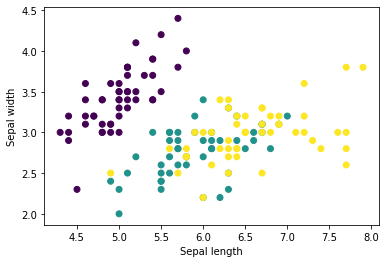

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot the training points
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["species"])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# How do we plot in Python?


* Many packages
* Most popular is matplotlib

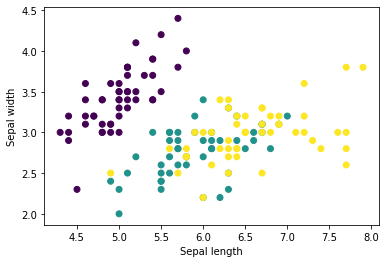

In [5]:
# convention is to rename pyplot to plt
import matplotlib.pyplot as plt

# magic command to display matplotlib plots inline
%matplotlib inline

# Plot
plt.scatter(
    iris["sepal_length"], # X axis is the sepal length
    iris["sepal_width"],  # Y axis is the sepal width
    c=iris["species"]     # Color is the species
)

# create labels
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# show
plt.show()


Text(0, 0.5, 'Petal width')

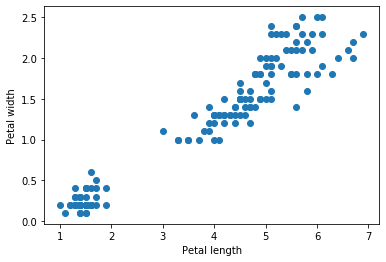

In [6]:
import matplotlib.pyplot as plt # convention is to rename pyplot to plt

# a "magic" command so that plots work in notebooks
%matplotlib inline

# PLT scatter plot (X, y, and color)
plt.scatter(iris["petal_length"], iris["petal_width"]) # Add color: c=iris["species"]

# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')

# Let's get fancy

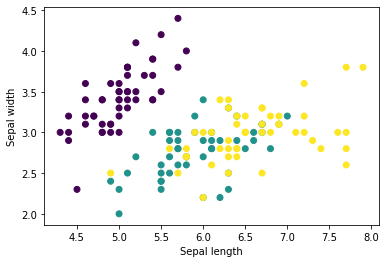

In [7]:
# Let's set some limits on the axes
plt.scatter(
    iris["sepal_length"], iris["sepal_width"],
    c=iris["species"],
    # cmap=plt.cm.Set1, # Set2, etc
    # alpha=0.5,
    # s=10, #iris["petal_length"] * 20,
    # marker="x",
)

# name the labels, for clarity
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Remove ticks
#plt.xticks(())
#plt.yticks(())

plt.show()

# Histograms
* What are they?
* When would we want them?
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

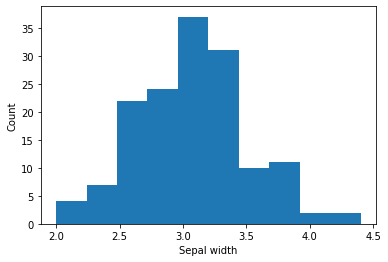

In [8]:
plt.hist(iris["sepal_width"])
plt.xlabel('Sepal width')
plt.ylabel('Count')
plt.show()

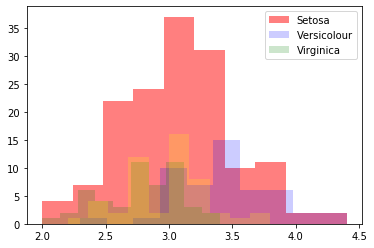

In [18]:
plt.hist(iris["sepal_width"], color="red", alpha = .5, cumulative=False) # alpha=0.5, log=True, orientation="horizontal", bins=80, cumulative=True
plt.hist(iris.loc[iris["species_name"] == "Setosa", "sepal_width"], color="blue", alpha=0.2)
plt.hist(iris.loc[iris["species_name"] == "Versicolour", "sepal_width"], color="green", alpha=0.2)
plt.hist(iris.loc[iris["species_name"] == "Virginica", "sepal_width"], color="yellow", alpha=0.2)
plt.legend(["Setosa", "Versicolour", "Virginica"])
plt.show()

# Bar plots
* What are they?
* When would we want them?
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.bar.html

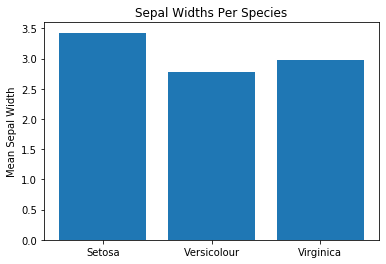

In [19]:
species = ("Setosa", "Versicolour", "Virginica")
y_pos = np.arange(len(species))
mean_widths = tuple(np.mean(iris.loc[iris["species_name"] == x, "sepal_width"]) for x in species)
 
plt.bar(y_pos, mean_widths)
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
    
plt.show()

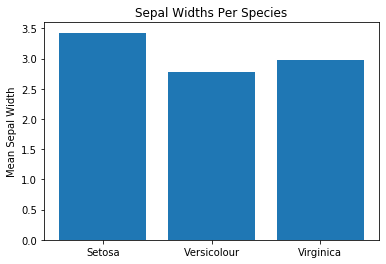

In [20]:
plt.bar(y_pos, mean_widths) #color="red", color=("red", "yellow", "green"), edgecolor=("blue", "green", "black")) # bottom=0, align='edge', width=(.1, .2, .3) , alpha=0.5)
# barh / yticks
plt.xticks(y_pos, species)
plt.ylabel('Mean Sepal Width')
plt.title('Sepal Widths Per Species')
 
plt.show()

# Box plots
* What are they?
* When would we want them?
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html

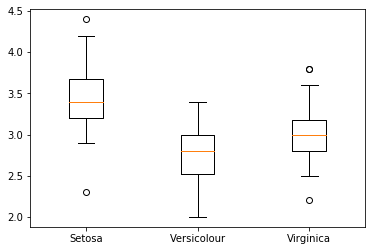

In [21]:
data_to_plot = list(iris.loc[iris["species_name"] == x, "sepal_width"] for x in species)
plt.boxplot(data_to_plot)
plt.xticks((1, 2, 3), species)
plt.show()

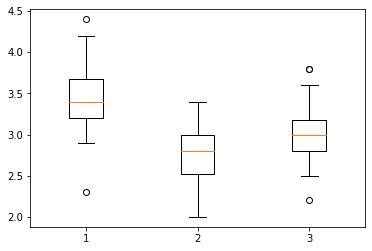

In [22]:
plt.boxplot(data_to_plot)#, notch=True, sym="x", vert=False, widths=.9, patch_artist=True, labels=species, showmeans=True)
# lie with medians, set outliers, etc
plt.show()

# Generic plot commands and subplots
* Doc: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html

### Figure
The canvas we are using.
### Subplot
Subsection of figure.
### Axes
Where we are plotting.

### plt.plot
Generic plot function that accepts x, y, and styling parameters.

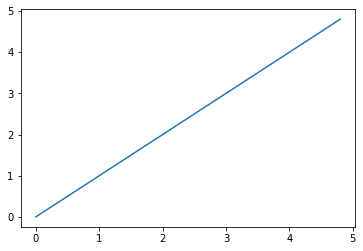

In [23]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t,
)
plt.show()

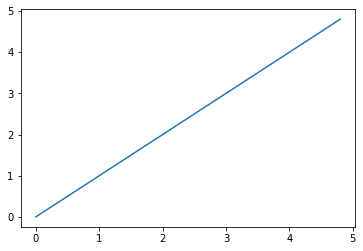

In [24]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, #linewidth=10, color="green",
)
plt.show()

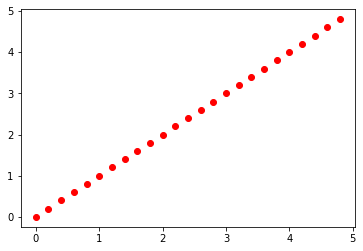

In [25]:
# evenly .2 intervals
t = np.arange(0., 5., 0.2)

# red dots
plt.plot(
    t, t, 'ro',
)
plt.show()

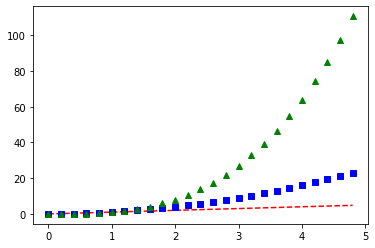

In [26]:
# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--',
    t, t**2, 'bs',
    t, t**3, 'g^'
)
plt.show()

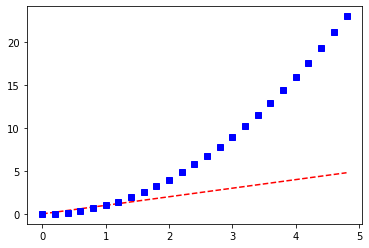

In [27]:
# red dashes, blue squares and green triangles
plt.plot(
    t, t, 'r--',
)

plt.plot(
    t, t**2, 'bs',
)

plt.show()

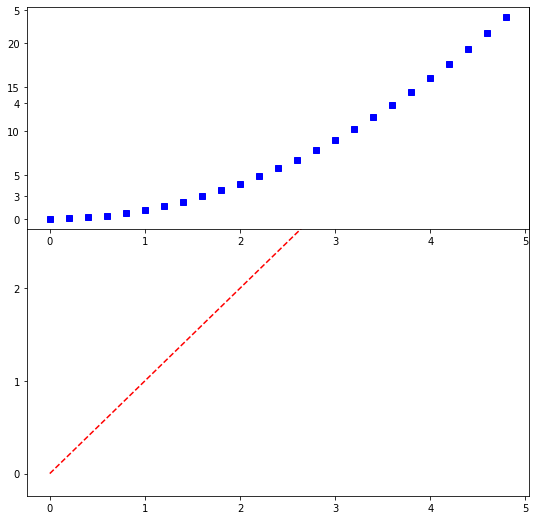

In [28]:
# subplots: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html
fig = plt.figure(figsize=(9, 9))
ax1 = fig.add_subplot(1, 1, 1)
ax2 = fig.add_subplot(2, 1, 1)

ax1.plot(
    t, t, 'r--',
)

ax2.plot(
    t, t**2, 'bs',
)

plt.show()

# Trend lines

In [ ]:
z = np.polyfit(iris["petal_length"], iris["petal_width"], 1)
p = np.poly1d(z)
print(z)
print(p)

In [ ]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris["petal_length"], iris["petal_width"])
z = np.polyfit(iris["petal_length"], iris["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris["petal_length"], p(iris["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')

In [ ]:
# PLT scatter plot (X, y, and color)
plt.scatter(iris["petal_length"], iris["petal_width"])
z = np.polyfit(iris["petal_length"], iris["petal_width"], 1)
p = np.poly1d(z)
plt.plot(iris["petal_length"], p(iris["petal_length"]),"r--")
# name the labels, for clarity
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.savefig("C:/Users/gusso/Desktop/x.png")

# Links
* https://matplotlib.org/index.html
* https://www.python-course.eu/matplotlib.php
* https://matplotlib.org/gallery.html

# Styles and other packages
* Matplotlib styles
* Pandas plotting based on matplotlib
* Seaborn
* Bokeh

['seaborn-notebook', 'seaborn-poster', 'classic', 'seaborn-paper', 'seaborn', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-muted', 'tableau-colorblind10', 'Solarize_Light2', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-deep', '_classic_test', 'ggplot', 'seaborn-pastel', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-dark', 'bmh', 'seaborn-white', 'seaborn-whitegrid', 'grayscale', 'dark_background']


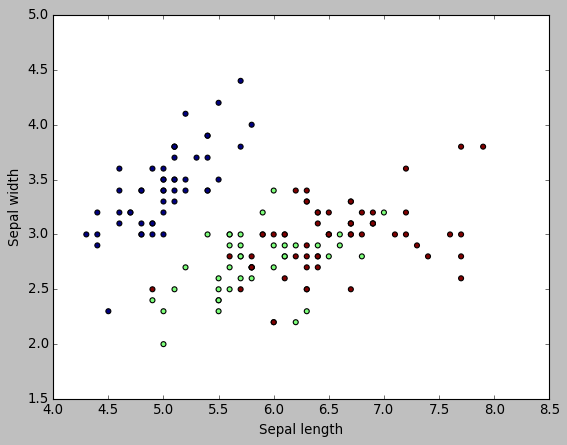

In [30]:
# Plot the training points
print(plt.style.available)
plt.figure()
plt.style.use("classic")
plt.scatter(iris["sepal_length"], iris["sepal_width"], c=iris["species"])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

# Pandas plotting based on matlab

* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html


<Figure size 640x480 with 0 Axes>

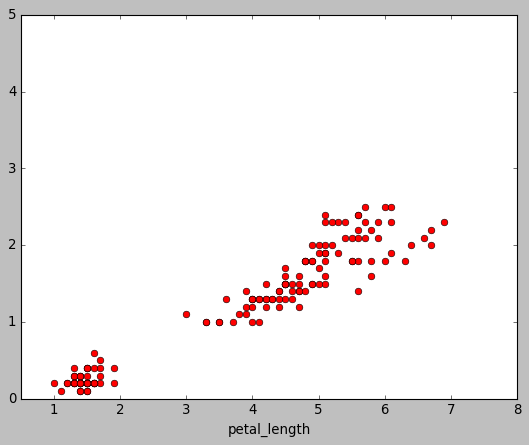

In [31]:
plt.style.use("classic")
plt.figure()
ax = iris.plot(x="petal_length", y="petal_width", style="ro", legend=False)
ax.set_xlim(0.5, 8.0)
ax.set_ylim(0, 5.0)
plt.show()

<Figure size 640x480 with 0 Axes>

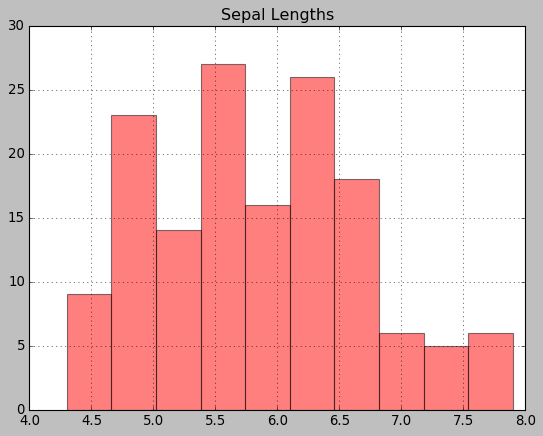

In [32]:
plt.style.use("classic")
plt.figure()
ax = iris.hist(column="sepal_length", color="red", alpha=0.5)
plt.title("Sepal Lengths")
plt.show()

# Seaborn
* https://seaborn.pydata.org/


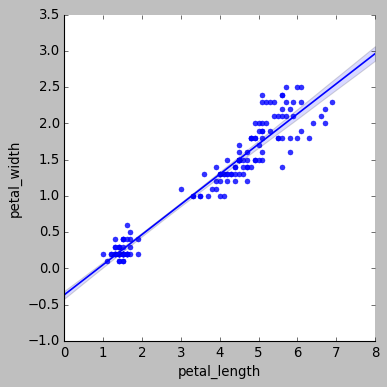

In [33]:
import seaborn as sns
sns.lmplot(x="petal_length", y="petal_width", data=iris) # , hue="species", fit_reg=False)

In [ ]:
import seaborn as sns
sns.distplot(iris["sepal_length"])

# Bokeh
* https://bokeh.pydata.org/en/latest/docs/user_guide/quickstart.html

# Assignment Issues
* If you're still having trouble submitting, let us know on Slack.
* Class documentation:
```python
class Dog:
    """
    Class documentation.
    """
    def __init__(self):
        """
        Init documentation.
        """
        pass
```
* Remove "raise NotImplementedError()" statement
* Naming